### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [74]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [18]:
data = pd.read_csv('data/coupons.csv')

In [277]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

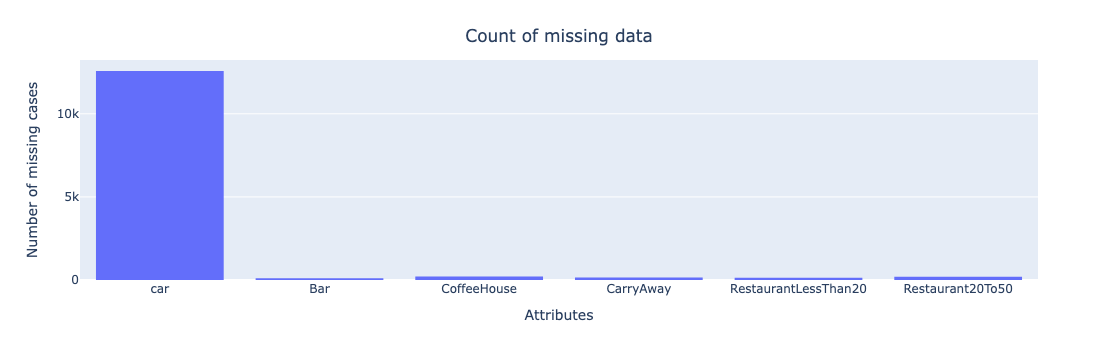

In [105]:
missing_df=data.isna().sum()
d=missing_df[missing_df>0] # Filter items that have missing data
fig=px.histogram(d,d.index, d.values)
fig.update_xaxes(title_text="Attributes")
fig.update_yaxes(title_text="Number of missing cases")
fig.update_layout(
    title={
        'text': 'Count of missing data',
        'x': 0.5,  # Set the x position to the center
        'xanchor': 'center',  # Anchor the title to the center
        'yanchor': 'top'  # Anchor the title to the top
    }
)

3. Decide what to do about your missing data -- drop, replace, other...

## Remove Car column
Remove the column since we don't have enough data around it.

4. What proportion of the total observations chose to accept the coupon?



In [128]:
data_car_removed=data.drop(columns=['car'])
dt=data_car_removed.isna().sum()
dt[dt>0]

Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
dtype: int64

5. Use a bar plot to visualize the `coupon` column.

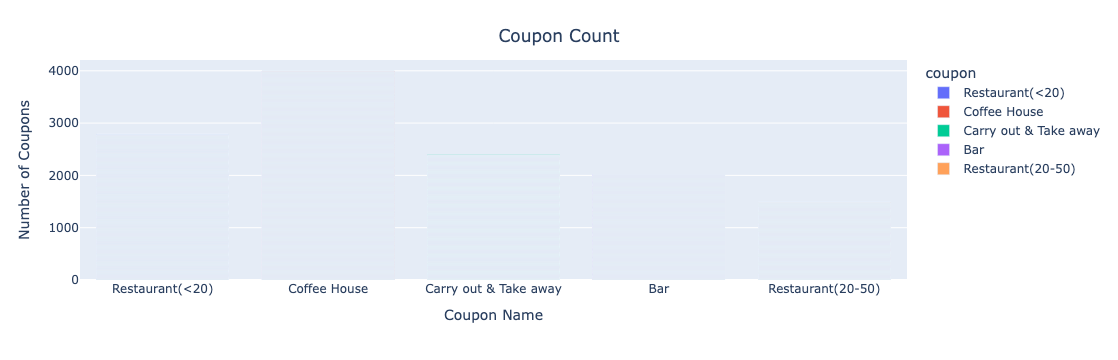

In [454]:
fig=px.bar(data,x='coupon',color='coupon')
fig.update_xaxes(title_text="Coupon Name")
fig.update_yaxes(title_text="Number of Coupons")
fig.update_layout(
    title={
        'text': 'Coupon Count',
        'x': 0.5,  # Set the x position to the center
        'xanchor': 'center',  # Anchor the title to the center
        'yanchor': 'top'  # Anchor the title to the top
    }
)

6. Use a histogram to visualize the temperature column.

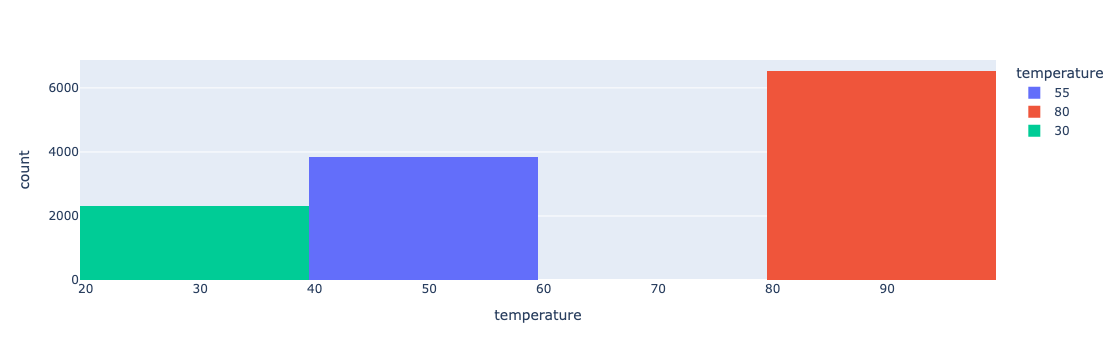

In [164]:
# Plot coupon data based on temperature
fig=px.histogram(data,x='temperature',color='temperature')
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [200]:
data_only_bar=data[data['coupon'] == 'Bar']
data_only_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?

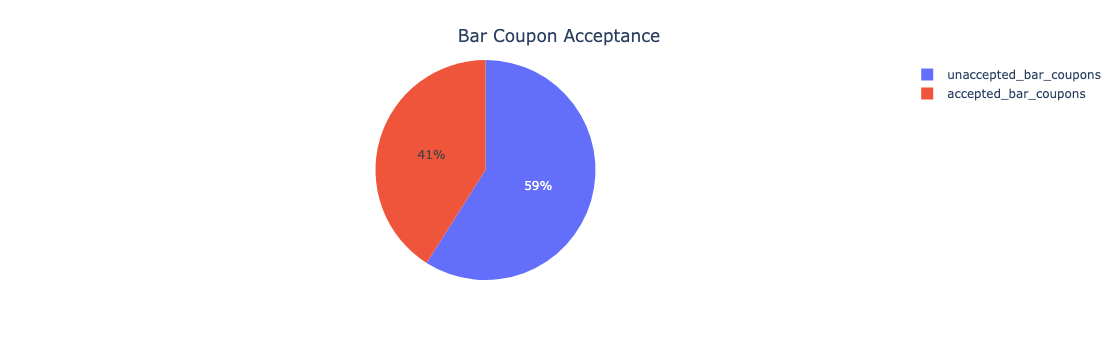

In [217]:
total_bar_coupons=len(data_only_bar)
accepted_bar_coupons=len(data_only_bar[data_only_bar['Y']==1])
# Create pie chart of bar coupon data based on acceptance
pie_data = {'labels': ['accepted_bar_coupons', 'unaccepted_bar_coupons'], 
            'values': [accepted_bar_coupons,(total_bar_coupons-accepted_bar_coupons)]}

fig = px.pie(pie_data, values='values', names='labels')
fig.update_layout(
    title={
        'text': 'Bar Coupon Acceptance',
        'x': 0.5,  # Set the x position to the center
        'xanchor': 'center',  # Anchor the title to the center
        'yanchor': 'top'  # Anchor the title to the top
    }
)
fig.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


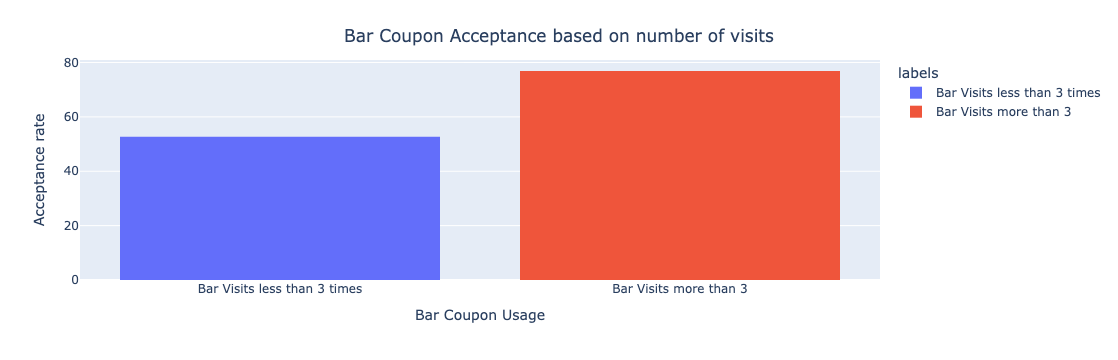

In [450]:
#Calculate coupon acceptance data based on number of visits less than 3
data_only_bar_less3=data_only_bar[((data_only_bar['Bar']=='1~3') | (data_only_bar['Bar']=='less1'))]
data_only_bar_accepted_less3=data_only_bar[(data_only_bar['Y']==1) & ((data_only_bar['Bar']=='1~3') | (data_only_bar['Bar']=='less1'))]
acceptance_rate_less3=len(data_only_bar_accepted_less3)/len(data_only_bar_less3)

#Calculate coupon acceptance data based on number of visits more than 3
data_only_bar_more3=data_only_bar[((data_only_bar['Bar']=='4~8') | (data_only_bar['Bar']=='gt8'))]
data_only_bar_accepted_more3=data_only_bar[(data_only_bar['Y']==1) & ((data_only_bar['Bar']=='4~8') | (data_only_bar['Bar']=='gt8'))]
acceptance_rate_more3=len(data_only_bar_accepted_more3)/len(data_only_bar_more3)

#Create histogram based on acceptance under the criteria of number of visits to bar
hist_data = {'labels': ['Bar Visits less than 3 times', 'Bar Visits more than 3'], 
            'values': [acceptance_rate_less3*100,acceptance_rate_more3*100]}
fig=px.histogram(hist_data,x='labels',y='values', color='labels')
fig.update_xaxes(title_text="Bar Coupon Usage")
fig.update_yaxes(title_text="Acceptance rate")
fig.update_layout(
    title={
        'text': 'Bar Coupon Acceptance based on number of visits',
        'x': 0.5,  # Set the x position to the center
        'xanchor': 'center',  # Anchor the title to the center
        'yanchor': 'top'  # Anchor the title to the top
    }
)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


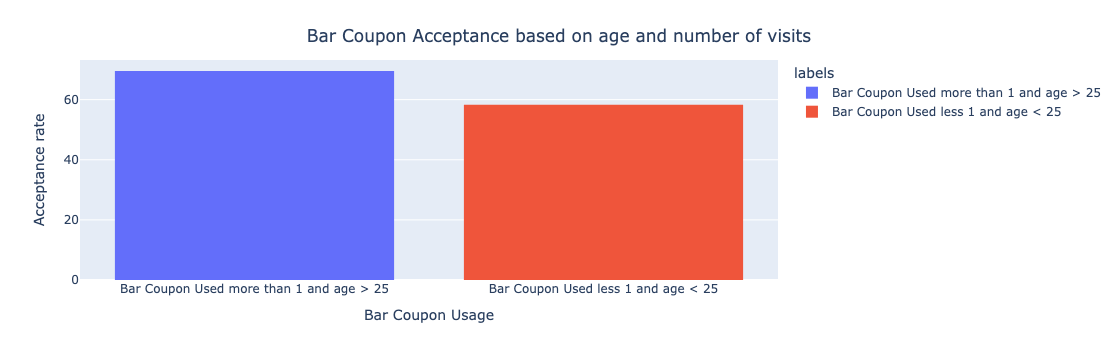

In [658]:

# Calculate acceptance rate based on age more than 25 and visits bar more than once
age=['21','below21']
data_only_bar_accepted_more1_age25=data_only_bar[(data_only_bar['Y']==1) & (~data_only_bar['age'].isin(age)) & ((data_only_bar['Bar']=='1~3') | (data_only_bar['Bar']=='4~8') | (data_only_bar['Bar']=='gt8'))]
data_only_bar_more1_age25=data_only_bar[(~data_only_bar['age'].isin(age)) & ((data_only_bar['Bar']=='1~3') | (data_only_bar['Bar']=='4~8') | (data_only_bar['Bar']=='gt8'))]
acceptance_rate_data_only_bar_more1_age25=len(data_only_bar_accepted_more1_age25)/len(data_only_bar_more1_age25)

# Calculate acceptance rate based on age more than 25 and visits bar less than once
data_only_bar_accepted_less1=data_only_bar[(data_only_bar['Y']==1) & (data_only_bar['age'].isin(age)) & ((data_only_bar['Bar']=='less1'))]
data_only_bar_less1=data_only_bar[(data_only_bar['age'].isin(age)) & ((data_only_bar['Bar']=='less1'))]
acceptance_rate_data_only_bar_less1=len(data_only_bar_accepted_less1)/len(data_only_bar_less1)

hist_data = {'labels': ['Bar Coupon Used more than 1 and age > 25', 'Bar Coupon Used less 1 and age < 25'], 
            'values': [acceptance_rate_data_only_bar_more1_age25*100, acceptance_rate_data_only_bar_less1*100]}
fig=px.histogram(hist_data,x='labels',y='values', color='labels')
fig.update_xaxes(title_text="Bar Coupon Usage")
fig.update_yaxes(title_text="Acceptance rate")
fig.update_layout(
    title={
        'text': 'Bar Coupon Acceptance based on age and number of visits',
        'x': 0.5,  # Set the x position to the center
        'xanchor': 'center',  # Anchor the title to the center
        'yanchor': 'top'  # Anchor the title to the top
    }
)

### From above plots it looks like bar coupon is more likely to be accepted in case of user visiting more

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [664]:
data_only_bar['age'].value_counts()
passanger=['Friend(s)','Partner']
occupation=['Farming Fishing & Forestry']
data_drivers_accepted=data_only_bar[(data_only_bar['Y']==1) & (data_only_bar['passanger'].isin(passanger)) & (~data_only_bar['occupation'].isin(occupation)) & ((data_only_bar['Bar']=='1~3') | (data_only_bar['Bar']=='4~8') | (data_only_bar['Bar']=='gt8'))]
data_drivers=data_only_bar[(data_only_bar['passanger'].isin(passanger)) & (~data_only_bar['occupation'].isin(occupation)) & ((data_only_bar['Bar']=='1~3') | (data_only_bar['Bar']=='4~8') | (data_only_bar['Bar']=='gt8'))]
driver_acceptance_rate=len(data_drivers_accepted)/len(data_drivers)
driver_acceptance_rate*100

71.7948717948718

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



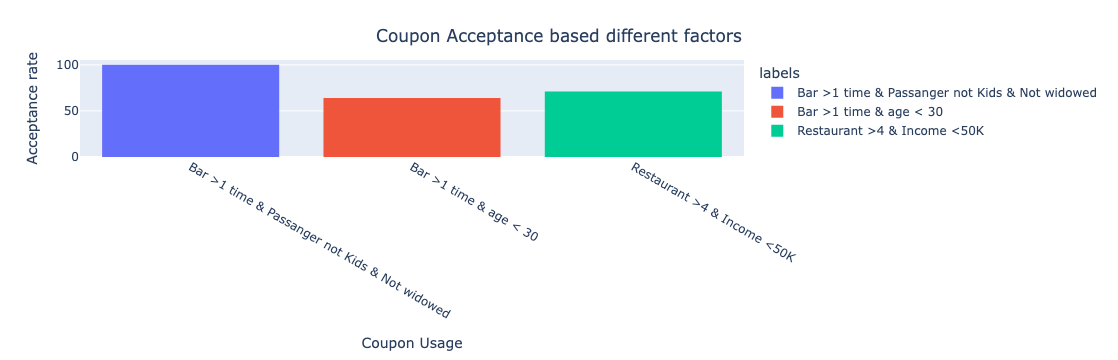

In [667]:

maritalStatus=['widowed']
passanger=['Friend(s)','Partner']
bar_more1_no_kids_not_widowed_accepted=data_only_bar[(data_only_bar['Y']==1) & (data_only_bar['passanger'].isin(passanger)) & (~data_only_bar['maritalStatus'].isin(maritalStatus)) & ((data_only_bar['Bar']=='1~3') | (data_only_bar['Bar']=='4~8') | (data_only_bar['Bar']=='gt8'))]
bar_more1_no_kids_not_widowed=data_only_bar[(data_only_bar['passanger'].isin(passanger)) & (~data_only_bar['maritalStatus'].isin(maritalStatus)) & ((data_only_bar['Bar']=='1~3') | (data_only_bar['Bar']=='4~8') | (data_only_bar['Bar']=='gt8'))]
bar_more1_no_kids_not_widowed_acceptance_rate=len(bar_more1_no_kids_not_widowed_accepted)/len(bar_more1_no_kids_not_widowed_accepted)
bar_more1_no_kids_not_widowed_acceptance_rate

age=['21','26','below21']
bar_more1_less30_accepted=data_only_bar[(data_only_bar['Y']==1) & (~data_only_bar['age'].isin(age)) & ((data_only_bar['Bar']=='1~3') | (data_only_bar['Bar']=='4~8') | (data_only_bar['Bar']=='gt8'))]
bar_more1_less30=data_only_bar[(~data_only_bar['age'].isin(age)) & ((data_only_bar['Bar']=='1~3') | (data_only_bar['Bar']=='4~8') | (data_only_bar['Bar']=='gt8'))]
bar_more1_less30_acceptance_rate=len(category2_accepted)/len(category2)
bar_more1_less30_acceptance_rate

data['coupon'].value_counts()
data_res=data[data['coupon'] == 'Restaurant(<20)']
times=['4~8','gt8']
res_more4_less50=data_res[data_res['RestaurantLessThan20'].isin(times)]
income=['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']
res_more4_less50_income=res_more4_less50[res_more4_less50['income'].isin(income)]
# data_res['income'].value_counts()
res_more4_less50_income_accepted=res_more4_less50_income[data_res_more4_income['Y']==1]
res_more4_less50_acceptance_rate=len(res_more4_less50_income_accepted)/len(res_more4_less50_income)

hist_data = {'labels': ['Bar >1 time & Passanger not Kids & Not widowed ', 'Bar >1 time & age < 30', 'Restaurant >4 & Income <50K'], 
            'values': [bar_more1_no_kids_not_widowed_acceptance_rate*100, bar_more1_less30_acceptance_rate*100,res_more4_less50_acceptance_rate*100]}
fig=px.histogram(hist_data,x='labels',y='values', color='labels')
fig.update_xaxes(title_text="Coupon Usage")
fig.update_yaxes(title_text="Acceptance rate")
fig.update_layout(
    title={
        'text': 'Coupon Acceptance based different factors',
        'x': 0.5,  # Set the x position to the center
        'xanchor': 'center',  # Anchor the title to the center
        'yanchor': 'top'  # Anchor the title to the top
    }
)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

1. There is a higher chance for users who visit more and have a partner or spouse along with them to use the coupons compared to when they are alone or there is a kid in the car
2. If they visit the bar more than 3 times per month the acceptance rate is higher in that scenario
3. In general, less than 50% of people has the coupon acceptance

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Restaurant(20-50) coupon analysis

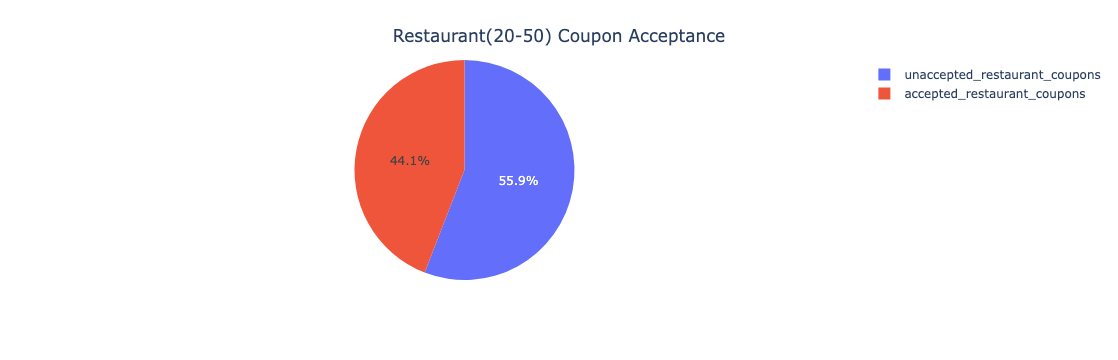

In [466]:
# Calculate coupon acceptance rate based on restaurant coupon data
data_res=data[data['coupon'] == 'Restaurant(20-50)']
data_res_accepted=len(data_res[data_res['Y'] == 1])
total_data_res=len(data_res)
pie_data = {'labels': ['accepted_restaurant_coupons', 'unaccepted_restaurant_coupons'],
            'values': [data_res_accepted,(total_data_res-data_res_accepted)]}

fig = px.pie(pie_data, values='values', names='labels')
fig.update_layout(
    title={
        'text': 'Restaurant(20-50) Coupon Acceptance',
        'x': 0.5,  # Set the x position to the center
        'xanchor': 'center',  # Anchor the title to the center
        'yanchor': 'top'  # Anchor the title to the top
    }
)
fig.show()

Text(0.5, 1.0, 'Coupon Acceptance based on age')

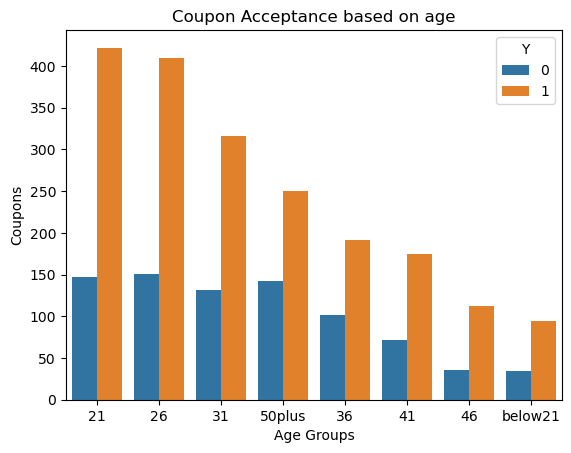

In [671]:
# Plot coupon acceptance based on age
data_res_count_by_age=data_res[['age','Y']].value_counts().reset_index()
sns.barplot(data_res_count_by_age, x='age', y='count', hue='Y')

plt.xlabel('Age Groups')
plt.ylabel('Coupons')
plt.title('Coupon Acceptance based on age')

Text(0.5, 1.0, 'Coupon Acceptance based on Passanger')

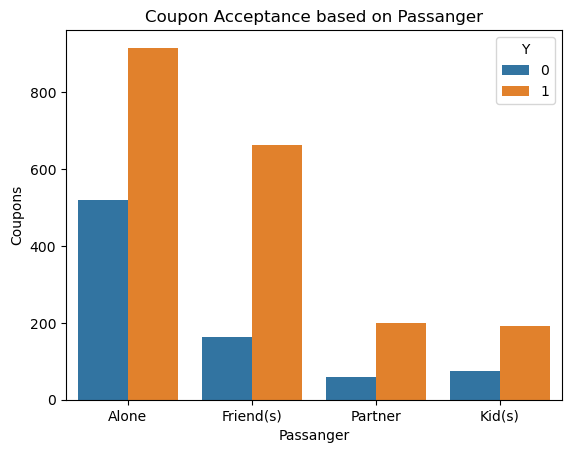

In [675]:
# Plot coupon acceptance based on type of passanger
data_res_pass=data_res[['Y','passanger']].value_counts().reset_index()
sns.barplot(data_res_pass, x='passanger', y='count', hue='Y')

plt.xlabel('Passanger')
plt.ylabel('Coupons')
plt.title('Coupon Acceptance based on Passanger')

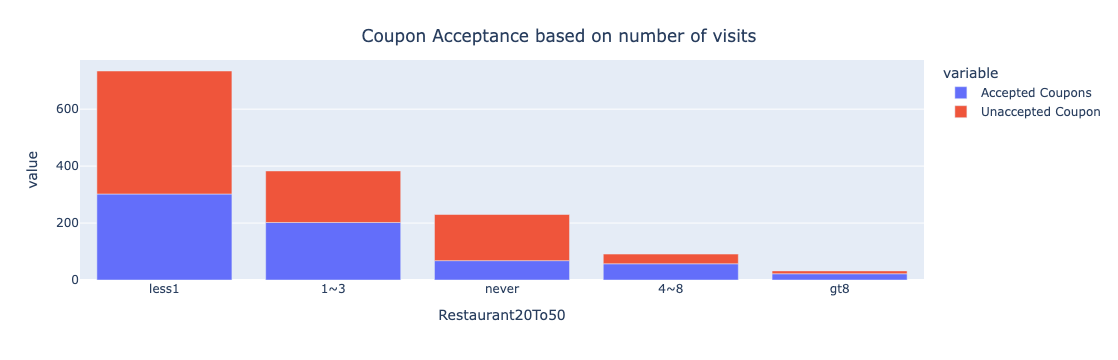

In [630]:

data_res_coupon_accepted=data_res[data_res['Y'] == 1][['Restaurant20To50']].value_counts().reset_index()
data_res_coupon_not_accepted=data_res[data_res['Y'] == 0][['Restaurant20To50']].value_counts().reset_index()
data_res_coupon_merged=pd.merge(data_res_coupon_accepted,data_res_coupon_not_accepted,on='Restaurant20To50')
data_res_coupon_merged_renamed=data_res_coupon_merged.rename(columns={"count_x": "Accepted Coupons", "count_y": "Unaccepted Coupon"})
fig=px.bar(data_res_coupon_merged_renamed, x="Restaurant20To50", y=["Accepted Coupons", "Unaccepted Coupon"])
fig.update_layout(
    title={
        'text': "Coupon Acceptance based on number of visits",
        'x': 0.5,  # Set the x position to the center
        'xanchor': 'center',  # Anchor the title to the center
        'yanchor': 'top'  # Anchor the title to the top
    }
)